# Preferential Attachment Model

## Degree Distributions

- the probability distribution of the degrees over the entire network

```python
degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

import matplotlib.pyplot as plt
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()
```

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
G=nx.Graph()
G.add_edges_from([('A','B'),('A','H'),('A','G'),('B','C'),('C','D'),
                  ('C','E'),('D','F'),('F','G'),('F','I'),('G','H'),('G','I')])

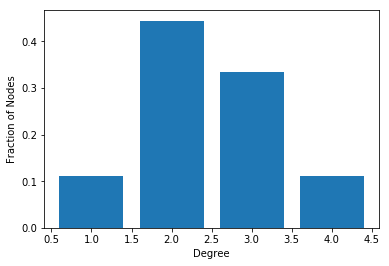

In [9]:
degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
                  
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

In [10]:
G1=nx.DiGraph()
G1.add_edges_from([('E','C'),('C','B'),('B','A'),('D','C'),('F','D'),
                  ('G','F'),('F','D'),('H','A'),('F','I'),('H','G'),('G','A'),('G','I')])

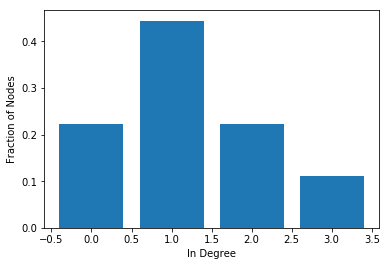

In [15]:
in_degrees=G1.in_degree()
in_degree_values=sorted(set(in_degrees.values()))
histogram=[list(in_degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in in_degree_values]
plt.bar(in_degree_values,histogram)
plt.xlabel("In Degree")
plt.ylabel("Fraction of Nodes")
plt.show()

<img src="week41.png" width="500px"></img>

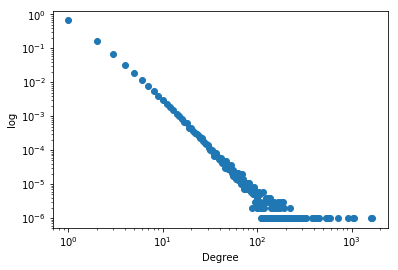

In [19]:
G = nx.barabasi_albert_graph(1000000,1)
degrees=G.degree()
degree_values=sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
plt.plot(degree_values,histogram,'o')
plt.xlabel('Degree')
plt.ylabel('log')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Summary
- The degree distribution of a graph is the probability distribution of the degrees over the entire network.  
- Many real networks have degree distributions that look like power laws ($P(k)=Ck^{-\alpha}$).  
- Models of network generation allow us to identify mechanisms that give rise to observed patterns in real data.  
- The Preferential Attachment Model produces networks with a power law degree distribution.  
- You can use the following code to construct a n-node preferential attachment network, where each new node attaches to m existing nodes. 
```python
barabasi_albert_graph(n,m)
```

## Small World Networks

Social networks tend to have high clustering coefficient and small average path length.

In [25]:
G = nx.barabasi_albert_graph(1000,4)
print(nx.average_clustering(G),nx.average_shortest_path_length(G))

0.03769346269849216 3.170766766766767


Small-world model:  
- Start with a ring of n nodes, where each node is connected to its k nearest neighbors.  
- Fix a parameter $p\in[0,1]$  
- Consider each edge(u,v). With probability p, select a node w at random and rewire the edge (u,v) so it becomes (u,w).  

```python
watts_strogatz_graph(n,k,p)
```
returns a samll world network with n nodes, starting with a ring lattice with each node connected to its k nearest neighbors, and rewiring probability p. 

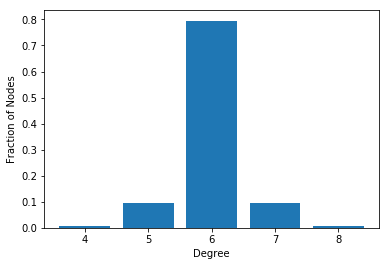

In [27]:
G = nx.watts_strogatz_graph(1000,6,0.04)
degrees= G.degree()
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

- Small world networks can be disconnected, which is sometimes undesirable.
```python
connected_watts_strogatz_graph(n,k,p,t)
```
runs up to t times until it returns a connected small world network.
```python
newman_watts_strogatz_graph(n,k,p)
```
runs a model similar to the small world model, but rather than rewiring edges, new edges are added with probability p.

### summary
- Real social networks appear to have small shortest paths between nodes and high clustering coefficient.   
- The preferencial attachment model produces networks with small shortest oaths but very small clustering coefficient. 
 
- The small worl model starts with a ring lattice with nodes connected to k nearest neighbors (high local clustering), and it rewires edges with probability p.   
- For small values of p, small world networks have small average shortest path and high clustering coefficient, matching what we observe in real networks.  
- However, the degree distribution of small world networks is not a power law.

## Link Prediction  
Whats new edges are likely to form in this network?

### Measure I: Common Neighbors
The number of common neighbors of nodes X and Y is $comm\_neigh(X,Y)=|N(X)\cap N(Y)|$, where N(X) is the set of neighbors of node X

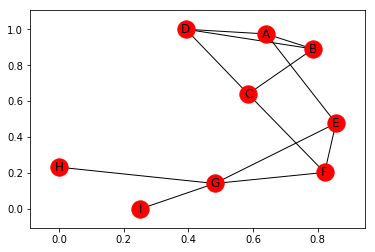

In [6]:
G=nx.Graph()
G.add_edges_from([('A','B'),('A','D'),('A','E'),('B','C'),('B','D'),
                  ('C','D'),('C','F'),('E','F'),('E','G'),('G','F'),('G','I'),('G','H')])
nx.draw_networkx(G)
plt.show()

In [8]:
common_neigh=[(e[0],e[1],len(list(nx.common_neighbors(G,e[0],e[1])))) for e in nx.non_edges(G)]
common_neigh

[('I', 'D', 0),
 ('I', 'A', 0),
 ('I', 'C', 0),
 ('I', 'E', 1),
 ('I', 'B', 0),
 ('I', 'H', 1),
 ('I', 'F', 1),
 ('H', 'D', 0),
 ('H', 'A', 0),
 ('H', 'C', 0),
 ('H', 'E', 1),
 ('H', 'B', 0),
 ('H', 'F', 1),
 ('D', 'E', 1),
 ('D', 'G', 0),
 ('D', 'F', 1),
 ('A', 'G', 1),
 ('A', 'F', 1),
 ('A', 'C', 2),
 ('C', 'E', 1),
 ('C', 'G', 1),
 ('E', 'B', 1),
 ('G', 'B', 0),
 ('B', 'F', 1)]

### Measure 2: Jaccard Coefficient
Number of common neighbors normalized by the total number of neighbors.  
The Jaccard coefficient of nodes X and Y is $$jacc\_coeff(X,Y)=\frac{|N(X)\cap N(Y)|}{|N(X)\cup N(Y)|}$$

In [10]:
L= list(nx.jaccard_coefficient(G))
L

[('I', 'D', 0.0),
 ('I', 'A', 0.0),
 ('I', 'C', 0.0),
 ('I', 'E', 0.3333333333333333),
 ('I', 'B', 0.0),
 ('I', 'H', 1.0),
 ('I', 'F', 0.3333333333333333),
 ('H', 'D', 0.0),
 ('H', 'A', 0.0),
 ('H', 'C', 0.0),
 ('H', 'E', 0.3333333333333333),
 ('H', 'B', 0.0),
 ('H', 'F', 0.3333333333333333),
 ('D', 'E', 0.2),
 ('D', 'G', 0.0),
 ('D', 'F', 0.2),
 ('A', 'G', 0.16666666666666666),
 ('A', 'F', 0.2),
 ('A', 'C', 0.5),
 ('C', 'E', 0.2),
 ('C', 'G', 0.16666666666666666),
 ('E', 'B', 0.2),
 ('G', 'B', 0.0),
 ('B', 'F', 0.2)]

### Measure 3: Resource Allocation
Fraction of a "resource" that a node can send to another through their common neighbors.  
The Resource Allocation index of nodes X and Y is $$res\_alloc(X,Y)=\sum_{u\in N(X) \cap N(Y)}\frac{1}{|N(u)|}$$

In [11]:
L = list(nx.resource_allocation_index(G))
L

[('I', 'D', 0),
 ('I', 'A', 0),
 ('I', 'C', 0),
 ('I', 'E', 0.25),
 ('I', 'B', 0),
 ('I', 'H', 0.25),
 ('I', 'F', 0.25),
 ('H', 'D', 0),
 ('H', 'A', 0),
 ('H', 'C', 0),
 ('H', 'E', 0.25),
 ('H', 'B', 0),
 ('H', 'F', 0.25),
 ('D', 'E', 0.3333333333333333),
 ('D', 'G', 0),
 ('D', 'F', 0.3333333333333333),
 ('A', 'G', 0.3333333333333333),
 ('A', 'F', 0.3333333333333333),
 ('A', 'C', 0.6666666666666666),
 ('C', 'E', 0.3333333333333333),
 ('C', 'G', 0.3333333333333333),
 ('E', 'B', 0.3333333333333333),
 ('G', 'B', 0),
 ('B', 'F', 0.3333333333333333)]

### Measure 4: Adamic-Adar Index
log in the denominator.  
$$adamic\_adar(X,Y) = \sum_{u\in N(X) \cap N(Y)}\frac{1}{log(|N(u)|)}$$

### Measure 5: Perf. Attachment
In the preferential attachment model, nodes with high degree get more neighbors.  
The preferential attachment scire of nodes X and Y is
$$pres\_attach(X,Y)=|N(X)||N(Y)|$$

In [12]:
L = list(nx.preferential_attachment(G))
L

[('I', 'D', 3),
 ('I', 'A', 3),
 ('I', 'C', 3),
 ('I', 'E', 3),
 ('I', 'B', 3),
 ('I', 'H', 1),
 ('I', 'F', 3),
 ('H', 'D', 3),
 ('H', 'A', 3),
 ('H', 'C', 3),
 ('H', 'E', 3),
 ('H', 'B', 3),
 ('H', 'F', 3),
 ('D', 'E', 9),
 ('D', 'G', 12),
 ('D', 'F', 9),
 ('A', 'G', 12),
 ('A', 'F', 9),
 ('A', 'C', 9),
 ('C', 'E', 9),
 ('C', 'G', 12),
 ('E', 'B', 9),
 ('G', 'B', 12),
 ('B', 'F', 9)]

### Measure 6: Community Common Neighbors
Number of common neighbors with bonus for neighbors in same community.  
The Common Neighbor Soundarajan_Hopcroft score of nodes X and Y is:$$cn\_soundarajan_hopcroft(X,Y)=|N(X)\cap N(Y)|+ \sum_{u\in N(X)\cap N(Y)}f(u)$$
where $$f(u)=\left\{
\begin{array}{rcl}
1       &      & {u\ in\ same\ comm.\ as\ X\ and\ Y}\\
0     &      & {otherwise}
\end{array} \right. $$

In [13]:
G.node['A']['community']=0
G.node['B']['community']=0
G.node['C']['community']=0
G.node['D']['community']=0
G.node['E']['community']=1
G.node['F']['community']=1
G.node['G']['community']=1
G.node['H']['community']=1
G.node['I']['community']=1

In [15]:
L = list(nx.cn_soundarajan_hopcroft(G))
L

[('I', 'D', 0),
 ('I', 'A', 0),
 ('I', 'C', 0),
 ('I', 'E', 2),
 ('I', 'B', 0),
 ('I', 'H', 2),
 ('I', 'F', 2),
 ('H', 'D', 0),
 ('H', 'A', 0),
 ('H', 'C', 0),
 ('H', 'E', 2),
 ('H', 'B', 0),
 ('H', 'F', 2),
 ('D', 'E', 1),
 ('D', 'G', 0),
 ('D', 'F', 1),
 ('A', 'G', 1),
 ('A', 'F', 1),
 ('A', 'C', 4),
 ('C', 'E', 1),
 ('C', 'G', 1),
 ('E', 'B', 1),
 ('G', 'B', 0),
 ('B', 'F', 1)]

### Measure 7: Community Resource Allocation
Similar to resource allocation index, but only considering nodes in the same community.

In [16]:
L = list(nx.ra_index_soundarajan_hopcroft(G))
L

[('I', 'D', 0),
 ('I', 'A', 0),
 ('I', 'C', 0),
 ('I', 'E', 0.25),
 ('I', 'B', 0),
 ('I', 'H', 0.25),
 ('I', 'F', 0.25),
 ('H', 'D', 0),
 ('H', 'A', 0),
 ('H', 'C', 0),
 ('H', 'E', 0.25),
 ('H', 'B', 0),
 ('H', 'F', 0.25),
 ('D', 'E', 0),
 ('D', 'G', 0),
 ('D', 'F', 0),
 ('A', 'G', 0),
 ('A', 'F', 0),
 ('A', 'C', 0.6666666666666666),
 ('C', 'E', 0),
 ('C', 'G', 0),
 ('E', 'B', 0),
 ('G', 'B', 0),
 ('B', 'F', 0)]

### Summary
- Link prediction pronlem: Given a network, predict which edge will be formed in the future.  
